# Assignment 3 - Text Analysis
An explanation this assignment could be found in the .pdf explanation document


## Materials to review for this assignment
<h4>From Moodle:</h4> 
<h5><u>Review the notebooks regarding the following python topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Working with strings</b> (tutorial notebook)<br/>
&#x2714; <b>Text Analysis</b> (tutorial notebook)<br/>
&#x2714; <b>Hebrew text analysis tools (tokenizer, wordnet)</b> (moodle example)<br/>
&#x2714; <b>(brief review) All previous notebooks</b><br/>
</div> 
<h5><u>Review the presentations regarding the following topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Text Analysis</b> (lecture presentation)<br/>
&#x2714; <b>(brief review) All other presentations</b><br/>
</div>

## Personal Details:

In [ ]:
# Details Student 1:

# Details Student 2:


## Preceding Step - import modules (packages)
This step is necessary in order to use external modules (packages). <br/>

In [2]:
# --------------------------------------
import pandas as pd
import numpy as np
# --------------------------------------


# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# ---------------------------------------


# ----------------- output and visualizations: 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

### Text analysis and String manipulation imports:

In [3]:
# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# regular expressions:
import re
# --------------------------------------

### (optional) Hebrew text analysis - WordNet (for Hebrew)
Note: the WordNet is not a must

#### (optional) Only if you didn't install Wordnet (for Hebrew) use:

In [60]:
# word net installation:

# unmark if you want to use and need to install
# !pip install wn
# !python -m wn download omw-he:1.4

In [4]:
# word net import:

# unmark if you want to use:
import wn

### (optional) Hebrew text analysis - hebrew_tokenizer (Tokenizer for Hebrew)
Note: the hebrew_tokenizer is not a must

#### (optional) Only if you didn't install hebrew_tokenizer use:

In [62]:
# Hebrew tokenizer installation:

# unmark if you want to use and need to install:
# !pip install hebrew_tokenizer

In [5]:
# Hebrew tokenizer import:

# unmark if you want to use:
import hebrew_tokenizer as ht

c:\Users\lielc\OneDrive\שולחן העבודה\assignment3-text_analysis


### Reading input files
Reading input files for train annotated corpus (raw text data) corpus and for the test corpus

In [6]:
train_filename = 'annotated_corpus_for_train.csv'
test_filename  = 'corpus_for_test.csv'
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

In [7]:
df_train.head(8)
df_train.shape

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f
5,לפני כ3 חודשים טסתי לרומא למשך שבוע. טסתי במטו...,f
6,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...,m
7,השנה התחלנו שיפוץ בדירה שלנו בתל אביב. הדירה ה...,f


(753, 2)

In [8]:
df_test.head(3)
df_test.shape

,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...


(323, 2)

### Your implementation:
Write your code solution in the following code-cells

### Before proceeding further, let's check some basic statistics:

<div class="alert alert-info">
&#x2714; The distribution of <b>male and female writers</b> in the training dataset.<br>
&#x2714; The total number of examples in both <b>training and testing datasets</b>.
</div>

In [9]:
# 1. Distribution of male and female writers in the training dataset
gender_distribution = df_train['gender'].value_counts(normalize=True) * 100

# 2. Total number of examples in both training and testing datasets
num_train_samples = len(df_train)
num_test_samples = len(df_test)

gender_distribution, num_train_samples, num_test_samples

(m   76.361
 f   23.639
 Name: gender, dtype: float64,
 753,
 323)

<h4>Observations from the Basic Statistics</h4> 
<h5><u>Distribution of Male and Female Writers</u>:</h5>
<div class="alert alert-info">
&#x2714; Approximately <b>76.36%</b> of the stories are written by <b>male writers</b>.<br/>
&#x2714; Approximately <b>23.64%</b> of the stories are written by <b>female writers</b>.<br/>
</div> 

<h4>Total Number of Examples:</h4> 
<div class="alert alert-info">
&#x2714; The <b>training dataset</b> contains <b>753 examples</b>.<br/>
&#x2714; The <b>testing dataset</b> contains <b>323 examples</b>.<br/>
</div>


## Preprocessing

In [10]:
# Regular expression pattern to match Hebrew letters
hebrew_pattern = r'[א-ת]+'

def clean_hebrew_text(text):
    """
    Clean and preprocess Hebrew text.
    1. Retain only Hebrew characters from the text using a regular expression.
    
    Parameters:
    text (str): The input text string
    
    Returns:
    str: The cleaned and preprocessed text string
    """
    # Find all Hebrew words in the text
    words = re.findall(hebrew_pattern, text)
    
    # Combine the words back into a cleaned text string
    cleaned_text = ' '.join(words)
    
    return cleaned_text

# Apply the cleaning function to the 'story' column in both training and testing datasets
df_train['cleaned_story'] = df_train['story'].apply(clean_hebrew_text)
df_test['cleaned_story'] = df_test['story'].apply(clean_hebrew_text)

# Display the first few rows of the cleaned training and testing datasets
cleaned_train_head = df_train.head()
cleaned_test_head = df_test.head()

cleaned_train_head, cleaned_test_head

(                                               story gender  \
 0  כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...      m   
 1  לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...      m   
 2  מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...      f   
 3  כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...      m   
 4  ‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...      f   
 
                                        cleaned_story  
 0  כשחבר הזמין אותי לחול לא באמת חשבתי שזה יקרה פ...  
 1  לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...  
 2  מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...  
 3  כשהייתי ילד מטוסים היה הדבר שהכי ריתק אותי בתו...  
 4  הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכים...  ,
    test_example_id                                              story  \
 0                0  כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...   
 1                1  הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת "...   
 2                2  אחת האהבות הגדולות שלי אלו הכלבים 

Let's examine the performance of the Hebrew tokenizer

In [11]:
def tokenize(df):
    for story in df_train['story']:
        tokens = ht.tokenize(story)  # tokenize returns a generator!
        for grp, token, token_num, (start_index, end_index) in tokens:
            if grp == 'HEBREW':
                #print('{}, {}'.format(grp, token))
                print('{}'.format(token))

In [12]:
def tokenizeq(df):
    tokens_series = []  # List to store the tokens for each story
    
    for story in df['story']:
        tokens = ht.tokenize(story)  # Assuming that ht.tokenize returns a generator
        tokens_lst = []
        for grp, token, token_num, (start_index, end_index) in tokens:
            if grp == 'HEBREW':
                tokens_lst.append(token)
                
        tokens_series.append(tokens_lst)  # Append the tokens list for the current story to our list
    
    # After the loop, assign the list of tokens as a new column in the DataFrame
    df['tokens'] = tokens_series
    
    return df

# Assuming df_train is your input DataFrame and ht is your tokenization module
df2 = df_train.copy()
df = tokenizeq(df2)

# Display the updated data frame with the tokens
print(df['tokens'])

0      [כשחבר, הזמין, אותי, לחול, לא, באמת, חשבתי, שז...
1      [לפני, שהתגייסתי, לצבא, עשיתי, כל, מני, מיונים...
2      [מאז, שהתחילו, הלימודים, חלומו, של, כל, סטודנט...
3      [כשהייתי, ילד, מטוסים, היה, הדבר, שהכי, ריתק, ...
4      [הייתי, מדריכה, בכפר, נוער, ומתאם, הכפר, היינו...
                             ...                        
748    [אז, לפני, שנה, בדיוק, טסתי, לאמסטרדם, עם, שני...
749    [שבוע, שעבר, העליתי, באופן, ספונטני, רעיון, לנ...
750    [לפני, חודש, עברנו, לדירה, בבית, שמש, בעקבות, ...
751    [החוויה, אותה, ארצה, לשתף, התרחשה, לפני, כמה, ...
752    [פעם, כשהייתי, בחו, ל, בקבולומביה, כחלק, מהטיו...
Name: tokens, Length: 753, dtype: object


<Figure size 1500x800 with 0 Axes>

<BarContainer object of 20 artists>

Text(0.5, 0, 'Tokens')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Top 20 Most Common Hebrew Tokens')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'תא'),
  Text(1, 0, 'אל'),
  Text(2, 0, 'לש'),
  Text(3, 0, 'לע'),
  Text(4, 0, 'היה'),
  Text(5, 0, 'םע'),
  Text(6, 0, 'ילש'),
  Text(7, 0, 'יל'),
  Text(8, 0, 'ינא'),
  Text(9, 0, 'לכ'),
  Text(10, 0, 'הז'),
  Text(11, 0, 'רחאל'),
  Text(12, 0, 'דואמ'),
  Text(13, 0, 'אוה'),
  Text(14, 0, 'לבא'),
  Text(15, 0, 'המ'),
  Text(16, 0, 'םג'),
  Text(17, 0, 'התייה'),
  Text(18, 0, 'ינאש'),
  Text(19, 0, 'יכ')])

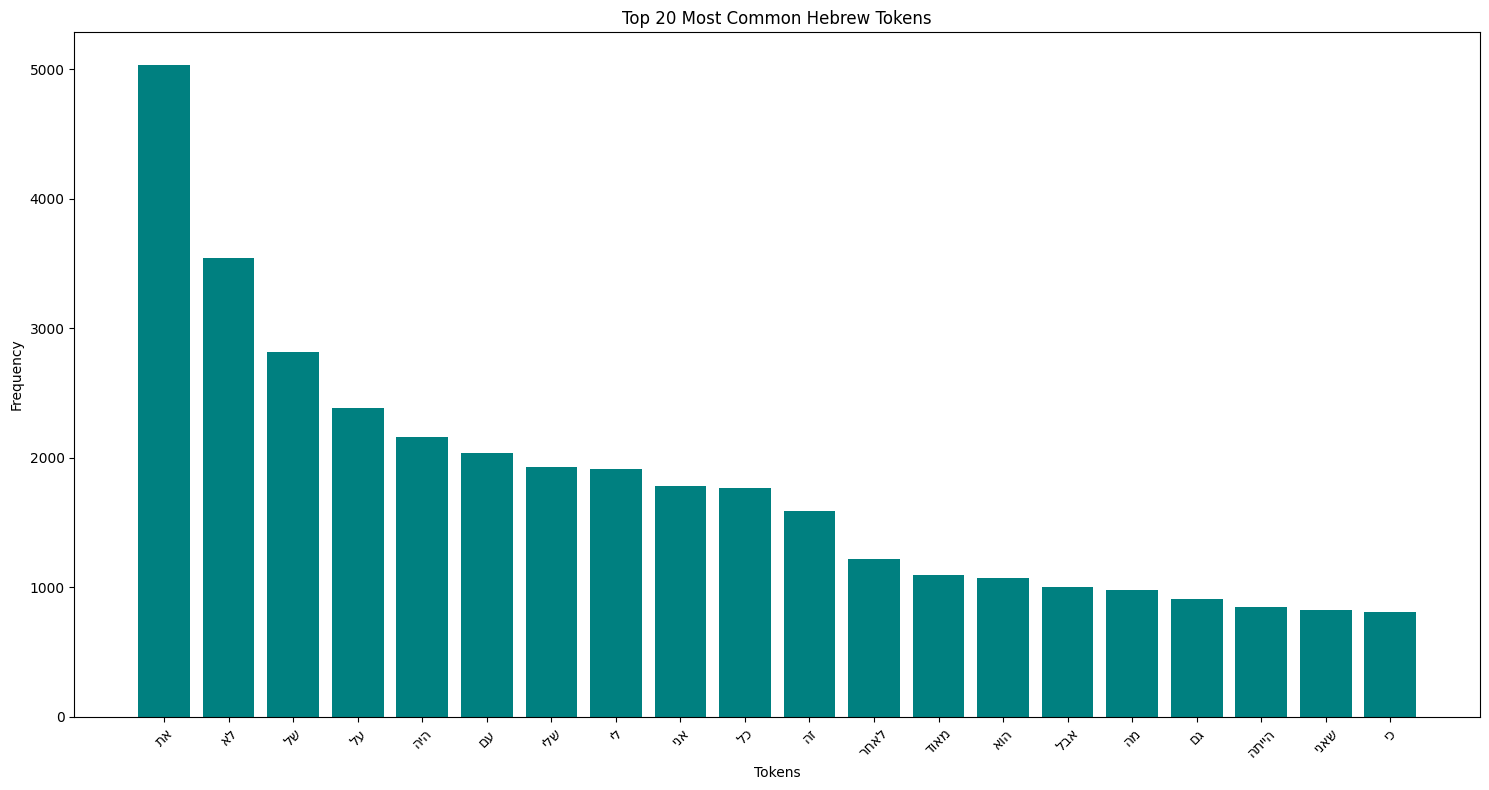

In [39]:
# Create a dictionary to store the frequencies of each token
token_freq_dict = {}

for token_list in df['tokens']:
    for token in token_list:
        if token in token_freq_dict:
            token_freq_dict[token] += 1
        else:
            token_freq_dict[token] = 1

# Sort the dictionary by its values (frequencies)
sorted_tokens = sorted(token_freq_dict.items(), key=lambda x: x[1], reverse=True)

# Get the top 20 tokens
top_20_tokens_dict = dict(sorted_tokens[:20])

# Extracting tokens and their frequencies for plotting
tokens, frequencies = zip(*top_20_tokens_dict.items())

# Reverse individual Hebrew tokens
reversed_tokens = [''.join(reversed(token)) for token in tokens]

plt.figure(figsize=(15, 8))
plt.bar(reversed_tokens, frequencies, color='teal')
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Hebrew Tokens')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

We can infer that most of the tokens are primarily conjunctions or linking terms.

# Let's start!

### Bag of Words (BoW)

In [13]:
# Initialize the CountVectorizer (BoW)
vectorizer_bow = CountVectorizer()

# Fit the CountVectorizer on the cleaned_story column of the training data
# and transform the training data into a BoW representation
X_train_bow = vectorizer_bow.fit_transform(df_train['cleaned_story'])

# Check the shape of the resulting BoW matrix for the training data
X_train_bow.shape

(753, 34441)

### Term Frequency-Inverse Document Frequency (TF-IDF)

In [14]:
# Initialize the TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer()

# Fit the TfidfVectorizer on the cleaned_story column of the training data
# and transform the training data into a TF-IDF representation
X_train_tfidf = vectorizer_tfidf.fit_transform(df_train['cleaned_story'])

# Check the shape of the resulting TF-IDF matrix for the training data
X_train_tfidf.shape

(753, 34441)

### Piplline

##### BOW piplline

In [184]:
# Define the target variable for the training data
y_train = df_train['gender']

# Create pipelines for the classifiers
pipelines = {
    'Decision Tree': DecisionTreeClassifier(),
    'MultinomialNB': MultinomialNB(),
    'KNN': Pipeline([('scaler', StandardScaler(with_mean=False)), ('KNN', KNeighborsClassifier())]),
    'Perceptron': Perceptron(),
    'SGDClassifier': SGDClassifier(),
    'LinearSVC': Pipeline([('scaler', StandardScaler(with_mean=False)), ('LinearSVC', LinearSVC())]),
    'MLPClassifier': MLPClassifier(max_iter=500) # Increase max_iter for convergence
}

# Evaluate the pipelines using cross-validation on the training data with the BoW representation
scores_bow = {}
for name, pipeline in pipelines.items():
    scores_bow[name] = cross_val_score(pipeline, X_train_bow, y_train, cv=10, scoring='f1_macro').mean()
    
scores_bow

{'Decision Tree': 0.5861195864650168,
 'MultinomialNB': 0.5257881880176476,
 'KNN': 0.4329778822905296,
 'Perceptron': 0.6156118056996043,
 'SGDClassifier': 0.6490645213020898,
 'LinearSVC': 0.49541579441941036,
 'MLPClassifier': 0.5575929119171216}

##### TF-IDF piplline

In [185]:
# Extract features using TF-IDF representation
X_train_tfidf = vectorizer_tfidf.transform(df_train['cleaned_story'])

# Evaluate the pipelines using cross-validation on the training data with the TF-IDF representation
scores_tfidf = {}
for name, pipeline in pipelines.items():
    scores_tfidf[name] = cross_val_score(pipeline, X_train_tfidf, y_train, cv=10, scoring='f1_macro').mean()

scores_tfidf

{'Decision Tree': 0.5978358241094894,
 'MultinomialNB': 0.4329778822905296,
 'KNN': 0.4381442331527182,
 'Perceptron': 0.6445937910971477,
 'SGDClassifier': 0.6065640880261922,
 'LinearSVC': 0.4962832221570671,
 'MLPClassifier': 0.5380789701232455}

##### Compare and visualize

Text(0.5, 0, 'Classifier')

Text(0, 0.5, 'Average Macro F1 Score')

Text(0.5, 1.0, 'Comparison of Classifier Performance')

[Text(0.175, 0, 'Decision Tree'),
 Text(1.175, 0, 'MultinomialNB'),
 Text(2.175, 0, 'KNN'),
 Text(3.175, 0, 'Perceptron'),
 Text(4.175, 0, 'SGDClassifier'),
 Text(5.175, 0, 'LinearSVC'),
 Text(6.175, 0, 'MLPClassifier')]

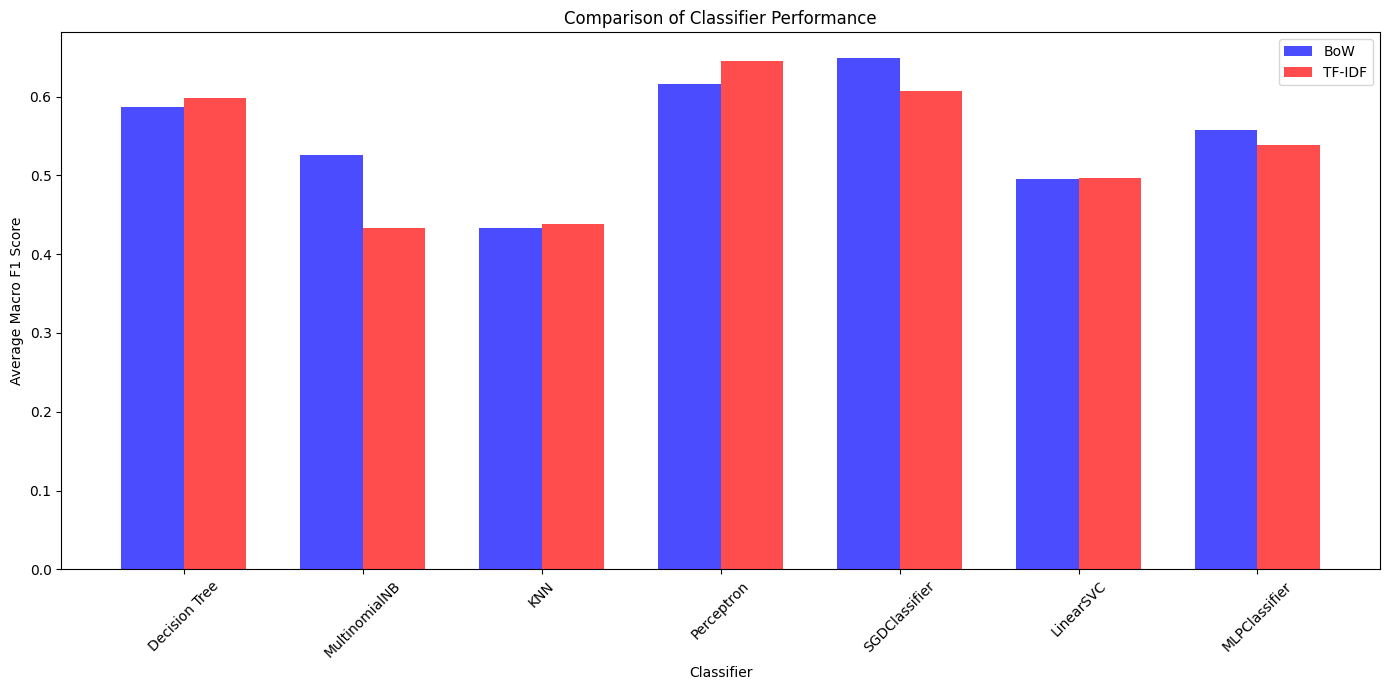

In [186]:
# Data for visualization
labels = list(scores_bow.keys())
boW_scores = list(scores_bow.values())
tfidf_scores = list(scores_tfidf.values())

# Setting up the figure and axes
fig, ax = plt.subplots(figsize=(14, 7))

# Creating the bar chart
bar_width = 0.35
index = range(len(labels))
bar1 = ax.bar(index, boW_scores, bar_width, label='BoW', color='b', alpha=0.7)
bar2 = ax.bar([i + bar_width for i in index], tfidf_scores, bar_width, label='TF-IDF', color='r', alpha=0.7)

# Labeling the chart
ax.set_xlabel('Classifier')
ax.set_ylabel('Average Macro F1 Score')
ax.set_title('Comparison of Classifier Performance')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(labels, rotation=45)
ax.legend()

# Displaying the chart
plt.tight_layout()
plt.show()

<h4>The Best Scores We Got Till Now:</h4>

<h4>TF-IDF Vectorization</h4>
<div class="alert alert-info">
&#x2714; <b>Perceptron</b>: 0.6445937910971477<br/>
&#x2714; <b>SGDClassifier</b>: 0.6065640880261922<br/>
</div>

<h4>Count Vectorizer</h4>
<div class="alert alert-info">
&#x2714; <b>SGDClassifier</b>: 0.6490645213020898<br/>
&#x2714; <b>Perceptron</b>: 0.6156118056996043<br/>
</div>

Now let's try improve by Hyperparameter Tuning..

## Hyperparameter Tuning

### Hyperparameters grid using TF-IDF

In [19]:
# Hyperparameters grid for Perceptron and SGDClassifier
param_grid_perceptron = {
    'clf__alpha': [0.0001, 0.001, 0.01, 0.1],
    'clf__penalty': ['l1', 'l2', 'elasticnet'],
    'clf__max_iter': [500, 1000, 1500],
    'clf__tol': [1e-3, 1e-4, 1e-5]
}

param_grid_sgd = {
    'clf__alpha': [0.0001, 0.001, 0.01, 0.1],
    'clf__loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'clf__penalty': ['l1', 'l2', 'elasticnet'],
    'clf__max_iter': [500, 1000, 1500],
    'clf__tol': [1e-3, 1e-4, 1e-5]
}

# Setting up GridSearchCV for each classifier with the TF-IDF pipeline
classifiers = {
    'Perceptron': (Perceptron(), param_grid_perceptron),
    'SGDClassifier': (SGDClassifier(), param_grid_sgd),
}

results7 = {}

for classifier_name, (classifier, param_grid) in classifiers.items():
    grid_search = GridSearchCV(
        Pipeline([
            ('tfidf', TfidfVectorizer()),
            ('clf', classifier)
        ]),
        param_grid=param_grid,
        cv=10,
        scoring='f1_macro',
        n_jobs=-1
    )
    
    # Fitting the grid search
    grid_search.fit(df_train['cleaned_story'], df_train['gender'])

    # Get the best parameters and score for each classifier
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    results7[classifier_name] = {
        'Best Parameters': best_params,
        'Best Score': best_score
    }

results7


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('clf', Perceptron())]),
             n_jobs=-1,
             param_grid={'clf__alpha': [0.0001, 0.001, 0.01, 0.1],
                         'clf__max_iter': [500, 1000, 1500],
                         'clf__penalty': ['l1', 'l2', 'elasticnet'],
                         'clf__tol': [0.001, 0.0001, 1e-05]},
             scoring='f1_macro')

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('clf', SGDClassifier())]),
             n_jobs=-1,
             param_grid={'clf__alpha': [0.0001, 0.001, 0.01, 0.1],
                         'clf__loss': ['hinge', 'log', 'modified_huber',
                                       'squared_hinge', 'perceptron'],
                         'clf__max_iter': [500, 1000, 1500],
                         'clf__penalty': ['l1', 'l2', 'elasticnet'],
                         'clf__tol': [0.001, 0.0001, 1e-05]},
             scoring='f1_macro')

{'Perceptron': {'Best Parameters': {'clf__alpha': 0.001,
   'clf__max_iter': 500,
   'clf__penalty': 'elasticnet',
   'clf__tol': 0.0001},
  'Best Score': 0.6598108451474792},
 'SGDClassifier': {'Best Parameters': {'clf__alpha': 0.0001,
   'clf__loss': 'perceptron',
   'clf__max_iter': 1500,
   'clf__penalty': 'l1',
   'clf__tol': 0.0001},
  'Best Score': 0.7019716810585466}}

### Hyperparameters grid using CountVectorizer

In [20]:
# Hyperparameters grid for Perceptron and SGDClassifier
param_grid_perceptron = {
    'clf__alpha': [0.0001, 0.001, 0.01, 0.1],
    'clf__penalty': ['l1', 'l2', 'elasticnet'],
    'clf__max_iter': [500, 1000, 1500],
    'clf__tol': [1e-3, 1e-4, 1e-5]
}

param_grid_sgd = {
    'clf__alpha': [0.0001, 0.001, 0.01, 0.1],
    'clf__loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'clf__penalty': ['l1', 'l2', 'elasticnet'],
    'clf__max_iter': [500, 1000, 1500],
    'clf__tol': [1e-3, 1e-4, 1e-5]
}

# Setting up GridSearchCV for each classifier with the CountVectorizer pipeline
classifiers = {
    'Perceptron': (Perceptron(), param_grid_perceptron),
    'SGDClassifier': (SGDClassifier(), param_grid_sgd),
}

results8 = {}

for classifier_name, (classifier, param_grid) in classifiers.items():
    grid_search = GridSearchCV(
        Pipeline([
            ('count', CountVectorizer()),
            ('clf', classifier)
        ]),
        param_grid=param_grid,
        cv=10,
        scoring='f1_macro',
        n_jobs=-1
    )
    
    # Fitting the grid search
    grid_search.fit(df_train['cleaned_story'], df_train['gender'])

    # Get the best parameters and score for each classifier
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    results8[classifier_name] = {
        'Best Parameters': best_params,
        'Best Score': best_score
    }

results8

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('count', CountVectorizer()),
                                       ('clf', Perceptron())]),
             n_jobs=-1,
             param_grid={'clf__alpha': [0.0001, 0.001, 0.01, 0.1],
                         'clf__max_iter': [500, 1000, 1500],
                         'clf__penalty': ['l1', 'l2', 'elasticnet'],
                         'clf__tol': [0.001, 0.0001, 1e-05]},
             scoring='f1_macro')

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('count', CountVectorizer()),
                                       ('clf', SGDClassifier())]),
             n_jobs=-1,
             param_grid={'clf__alpha': [0.0001, 0.001, 0.01, 0.1],
                         'clf__loss': ['hinge', 'log', 'modified_huber',
                                       'squared_hinge', 'perceptron'],
                         'clf__max_iter': [500, 1000, 1500],
                         'clf__penalty': ['l1', 'l2', 'elasticnet'],
                         'clf__tol': [0.001, 0.0001, 1e-05]},
             scoring='f1_macro')

{'Perceptron': {'Best Parameters': {'clf__alpha': 0.0001,
   'clf__max_iter': 500,
   'clf__penalty': 'l2',
   'clf__tol': 0.0001},
  'Best Score': 0.6565322889501943},
 'SGDClassifier': {'Best Parameters': {'clf__alpha': 0.0001,
   'clf__loss': 'modified_huber',
   'clf__max_iter': 1000,
   'clf__penalty': 'l1',
   'clf__tol': 0.0001},
  'Best Score': 0.6874821574750285}}

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Classifiers')

Text(0, 0.5, 'F1 Macro Scores')

Text(0.5, 1.0, 'Comparison of F1 Macro Scores with TF-IDF and Count Vectorization')

([<matplotlib.axis.XTick at 0x21c1fcfb1c0>,
 [Text(0, 0, 'Perceptron'), Text(1, 0, 'SGDClassifier')])

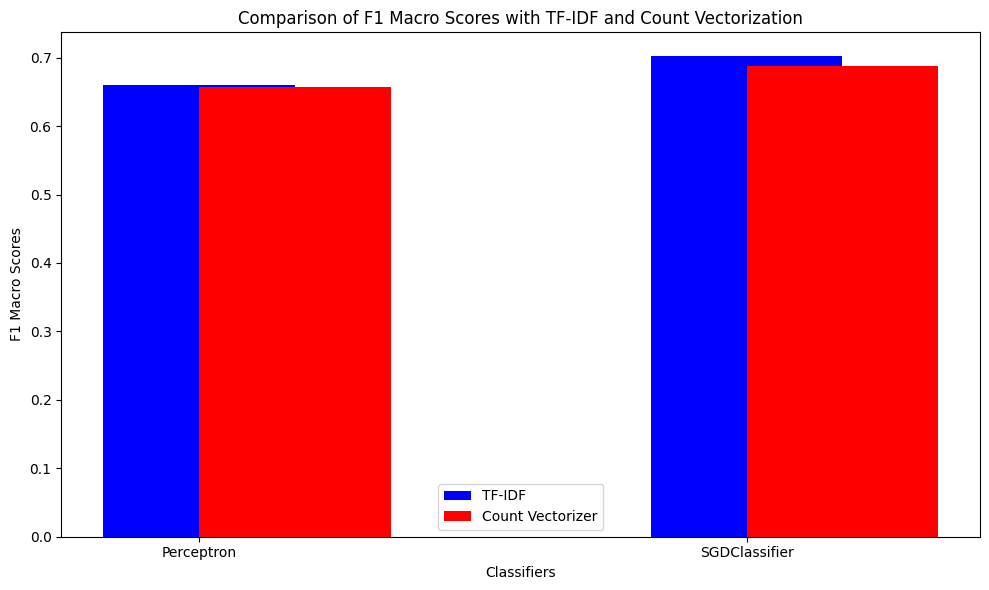

In [31]:
# Extracting scores for plotting
tfidf_scores = [results7[classifier]['Best Score'] for classifier in classifiers.keys()]
count_scores = [results8[classifier]['Best Score'] for classifier in classifiers.keys()]

# Setting up the bar positions
bar_width = 0.35
index = range(len(classifiers))

# Creating the bar plot
plt.figure(figsize=(10, 6))
bar1 = plt.bar(index, tfidf_scores, bar_width, label='TF-IDF', color='b', align='center')
bar2 = plt.bar(index, count_scores, bar_width, label='Count Vectorizer', color='r', align='edge')

# Labeling the plot
plt.xlabel('Classifiers')
plt.ylabel('F1 Macro Scores')
plt.title('Comparison of F1 Macro Scores with TF-IDF and Count Vectorization')
plt.xticks(index, classifiers.keys())
plt.legend()
plt.tight_layout()

plt.show()

<h4>The best score now is: </h4>
SGDClassifier</b>: 0.7019716810585466

Add Normalizer

In [21]:
# Hyperparameters grid for SGDClassifier
param_grid_sgd = {
    'clf__alpha': [0.0001, 0.001, 0.01, 0.1],
    'clf__loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'clf__penalty': ['l1', 'l2', 'elasticnet'],
    'clf__max_iter': [500, 1000, 1500],
    'clf__tol': [1e-3, 1e-4, 1e-5]
}


# Setting up GridSearchCV for each classifier with the TF-IDF pipeline
classifiers = {
    'Perceptron': (Perceptron(), param_grid_perceptron),
    'SGDClassifier': (SGDClassifier(), param_grid_sgd)
}

results9 = {}

for classifier_name, (classifier, param_grid) in classifiers.items():
    grid_search = GridSearchCV(
        Pipeline([
            ('tfidf', TfidfVectorizer()),
            ('norm', preprocessing.Normalizer()), 
            ('clf', classifier)
        ]),
        param_grid=param_grid,
        cv=10,
        scoring='f1_macro',
        n_jobs=-1
    )
    
    # Fitting the grid search
    grid_search.fit(df_train['cleaned_story'], df_train['gender'])

    # Get the best parameters and score for each classifier
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    results9[classifier_name] = {
        'Best Parameters': best_params,
        'Best Score': best_score
    }

results9

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('norm', Normalizer()),
                                       ('clf', Perceptron())]),
             n_jobs=-1,
             param_grid={'clf__alpha': [0.0001, 0.001, 0.01, 0.1],
                         'clf__max_iter': [500, 1000, 1500],
                         'clf__penalty': ['l1', 'l2', 'elasticnet'],
                         'clf__tol': [0.001, 0.0001, 1e-05]},
             scoring='f1_macro')

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('norm', Normalizer()),
                                       ('clf', SGDClassifier())]),
             n_jobs=-1,
             param_grid={'clf__alpha': [0.0001, 0.001, 0.01, 0.1],
                         'clf__loss': ['hinge', 'log', 'modified_huber',
                                       'squared_hinge', 'perceptron'],
                         'clf__max_iter': [500, 1000, 1500],
                         'clf__penalty': ['l1', 'l2', 'elasticnet'],
                         'clf__tol': [0.001, 0.0001, 1e-05]},
             scoring='f1_macro')

{'Perceptron': {'Best Parameters': {'clf__alpha': 0.001,
   'clf__max_iter': 500,
   'clf__penalty': 'elasticnet',
   'clf__tol': 0.0001},
  'Best Score': 0.6598108451474792},
 'SGDClassifier': {'Best Parameters': {'clf__alpha': 0.0001,
   'clf__loss': 'modified_huber',
   'clf__max_iter': 500,
   'clf__penalty': 'l1',
   'clf__tol': 0.001},
  'Best Score': 0.7197841803090071}}

Now we got 0.7197841803090071!

# Let's try improve more...

## Feature Engineering

##### N-grams with best params from above

In [34]:
param_grid_sgd = {
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3), (2, 2)],
    'tfidf__analyzer': ['word', 'char'],
    'tfidf__use_idf': [True, False],
    'tfidf__norm': ['l1', 'l2']
}

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('norm', preprocessing.Normalizer()), 
    ('clf', SGDClassifier(alpha=0.0001, loss='modified_huber', penalty='l1', max_iter=500, tol=0.001))
])

grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid_sgd,
    cv=10,
    scoring='f1_macro',
    n_jobs=-1
)

# Fitting the grid search
grid_search.fit(df_train['cleaned_story'], df_train['gender'])

results10 = {
    'SGDClassifier': {
        'Best Parameters': grid_search.best_params_,
        'Best Score': grid_search.best_score_
    }
}

results10

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('norm', Normalizer()),
                                       ('clf',
                                        SGDClassifier(loss='modified_huber',
                                                      max_iter=500,
                                                      penalty='l1'))]),
             n_jobs=-1,
             param_grid={'tfidf__analyzer': ['word', 'char'],
                         'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3), (2, 2)],
                         'tfidf__norm': ['l1', 'l2'],
                         'tfidf__use_idf': [True, False]},
             scoring='f1_macro')

{'SGDClassifier': {'Best Parameters': {'tfidf__analyzer': 'word',
   'tfidf__ngram_range': (1, 3),
   'tfidf__norm': 'l1',
   'tfidf__use_idf': True},
  'Best Score': 0.7245052919900502}}

<div class="alert alert-success">
    &#x2714; We got the <b>best F1 average score</b> of: <b>0.7245</b>.
</div>

In [48]:
# Extracting the best hyperparameters for the SGDClassifier from the results
best_sgd_params = results10['SGDClassifier']['Best Parameters']

# Initialize the TfidfVectorizer with the best parameters
vectorizer = TfidfVectorizer(
    analyzer=best_sgd_params['tfidf__analyzer'],
    ngram_range=best_sgd_params['tfidf__ngram_range'],
    norm=best_sgd_params['tfidf__norm'],
    use_idf=best_sgd_params['tfidf__use_idf']
)
X_train_tfidf = vectorizer.fit_transform(df_train['cleaned_story'])
X_test_tfidf = vectorizer.transform(df_test['cleaned_story'])

# Initialize and train the SGDClassifier with the best parameters
sgd_clf = SGDClassifier(
    alpha=0.0001,
    loss='modified_huber',
    penalty='l1',
    max_iter=500,
    tol=0.001,
)
sgd_clf.fit(X_train_tfidf, df_train['gender'].replace({'m':0, 'f':1}))

# Make predictions on the test dataset
predictions = sgd_clf.predict(X_test_tfidf)

SGDClassifier(loss='modified_huber', max_iter=500, penalty='l1')

In [50]:
# YOUR CODE HERE
# Create a DataFrame for the results
df_predicted = pd.DataFrame({
    'test_example_id': df_test['test_example_id'],
    'predicted_category': ['m' if pred == 0 else 'f' for pred in predictions]
})

# Display the first 5 and last 5 predictions from the test dataset
df_predicted_head_tail = pd.concat([df_predicted.head(5), df_predicted.tail(5)])
df_predicted_head_tail

,test_example_id,predicted_category
0,0,m
1,1,m
2,2,m
3,3,m
4,4,m
318,318,m
319,319,m
320,320,m
321,321,m
322,322,m


In [84]:
# YOUR CODE HERE

In [85]:
# Add as many code cells as you need
# YOUR CODE HERE


### Save output to csv (optional)
After you're done save your output to the 'classification_results.csv' csv file.<br/>
We assume that the dataframe with your results contain the following columns:
* column 1 (left column): 'test_example_id'  - the same id associated to each of the test stories to be predicted.
* column 2 (right column): 'predicted_category' - the predicted gender value for each of the associated story. 

Assuming your predicted values are in the `df_predicted` dataframe, you should save you're results as following:

In [51]:
df_predicted.to_csv('classification_results.csv',index=False)